In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [4]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [8]:
df.columns = df.columns.str.lower()

In [10]:
list(df.columns)

['customer',
 'state',
 'customer lifetime value',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employmentstatus',
 'gender',
 'income',
 'location code',
 'marital status',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'total claim amount',
 'vehicle class',
 'vehicle size']

In [11]:
df.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim            int64
months since policy inception      int64
number of open complaints          int64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

In [15]:
df[["gender"]]

,gender
0,F
1,F
2,F
3,M
4,M
...,...
9129,M
9130,F
9131,M
9132,M


In [17]:
df1=df.copy()

In [23]:
df.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

In [28]:
df.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [29]:
summary = df.describe().T
display(summary)

summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round) 
summary

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


,count,mean,std,min,25%,50%,75%,max,iqr
customer lifetime value,9134.0,8005.0,6871.0,1898.0,3994.0,5780.0,8962.0,83325.0,4968.0
income,9134.0,37657.0,30380.0,0.0,0.0,33890.0,62320.0,99981.0,62320.0
monthly premium auto,9134.0,93.0,34.0,61.0,68.0,83.0,109.0,298.0,41.0
months since last claim,9134.0,15.0,10.0,0.0,6.0,14.0,23.0,35.0,17.0
months since policy inception,9134.0,48.0,28.0,0.0,24.0,48.0,71.0,99.0,47.0
number of open complaints,9134.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
number of policies,9134.0,3.0,2.0,1.0,1.0,2.0,4.0,9.0,3.0
total claim amount,9134.0,434.0,291.0,0.0,272.0,384.0,548.0,2893.0,275.0


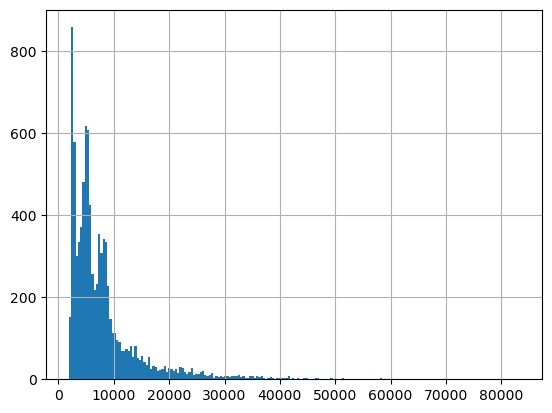

In [40]:
df['customer lifetime value'].hist(bins=200)
plt.show()


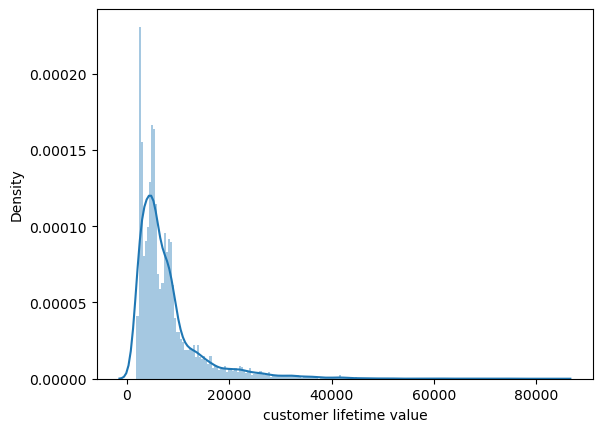

In [41]:
sns.distplot(df['customer lifetime value'], bins=200)
plt.show()

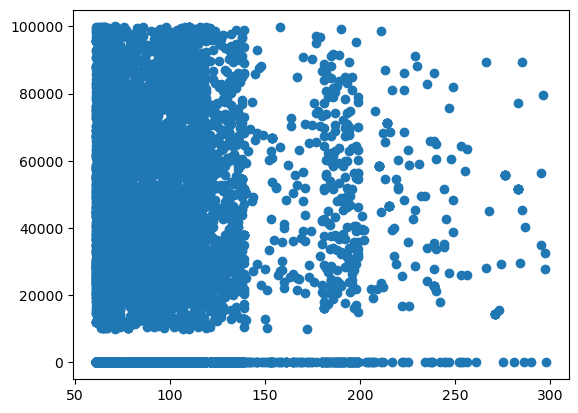

In [46]:
plt.scatter(df['monthly premium auto'], df['income'])
plt.show()

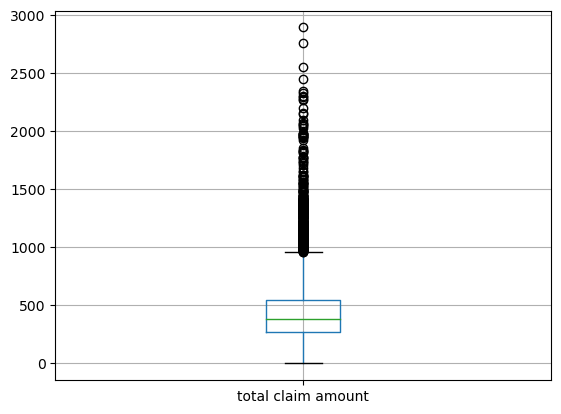

In [51]:
df[['total claim amount']].boxplot()
plt.show()

(array([4715., 2074., 1553.,  310.,   80.,  247.,   62.,   45.,   21.,
          27.]),
 array([ 61. ,  84.7, 108.4, 132.1, 155.8, 179.5, 203.2, 226.9, 250.6,
        274.3, 298. ]),
 <BarContainer object of 10 artists>)

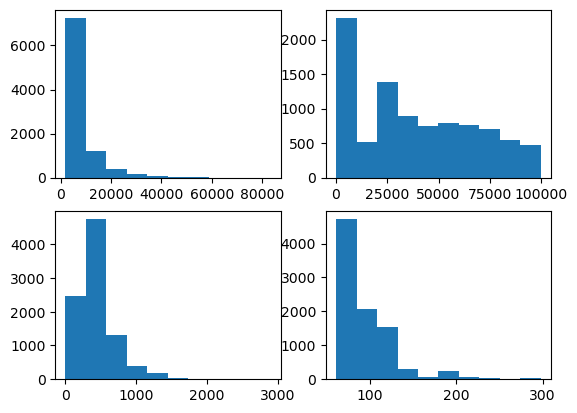

In [57]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(df['customer lifetime value'])
axs[0, 1].hist(df['income'])
axs[1, 0].hist(df['total claim amount'])
axs[1, 1].hist(df['monthly premium auto'])

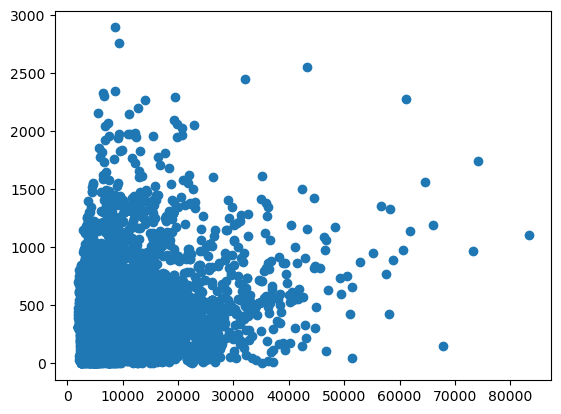

In [62]:
x = df['customer lifetime value']
y = df['total claim amount']

plt.scatter(x, y)
plt.show()

In [63]:
x.corr(y)

0.22645091528641695

In [67]:
df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [68]:
df.corr(method='spearman')['total claim amount']

customer lifetime value          0.210598
income                          -0.401598
monthly premium auto             0.522261
months since last claim         -0.000782
months since policy inception   -0.006569
number of open complaints       -0.024694
number of policies              -0.011100
total claim amount               1.000000
Name: total claim amount, dtype: float64

In [69]:
corr_data = df.select_dtypes([np.number])
correlations_matrix = corr_data.corr(method='spearman')  # method='spearman'
correlations_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.055395,0.453933,0.005126,-0.002429,-0.031312,0.488860,0.210598
income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,0.006334,-0.010273,-0.401598
monthly premium auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,-0.012751,-0.006936,0.522261
months since last claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,0.005736,0.011439,-0.000782
months since policy inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.013233,-0.009546,-0.006569
number of open complaints,-0.031312,0.006334,-0.012751,0.005736,-0.013233,1.000000,0.001523,-0.024694
number of policies,0.488860,-0.010273,-0.006936,0.011439,-0.009546,0.001523,1.000000,-0.011100
total claim amount,0.210598,-0.401598,0.522261,-0.000782,-0.006569,-0.024694,-0.011100,1.000000


In [72]:
correlations_matrix[(correlations_matrix['total claim amount'] > .2) | (correlations_matrix['total claim amount'] < -.2)]['total claim amount']

customer lifetime value    0.210598
income                    -0.401598
monthly premium auto       0.522261
total claim amount         1.000000
Name: total claim amount, dtype: float64

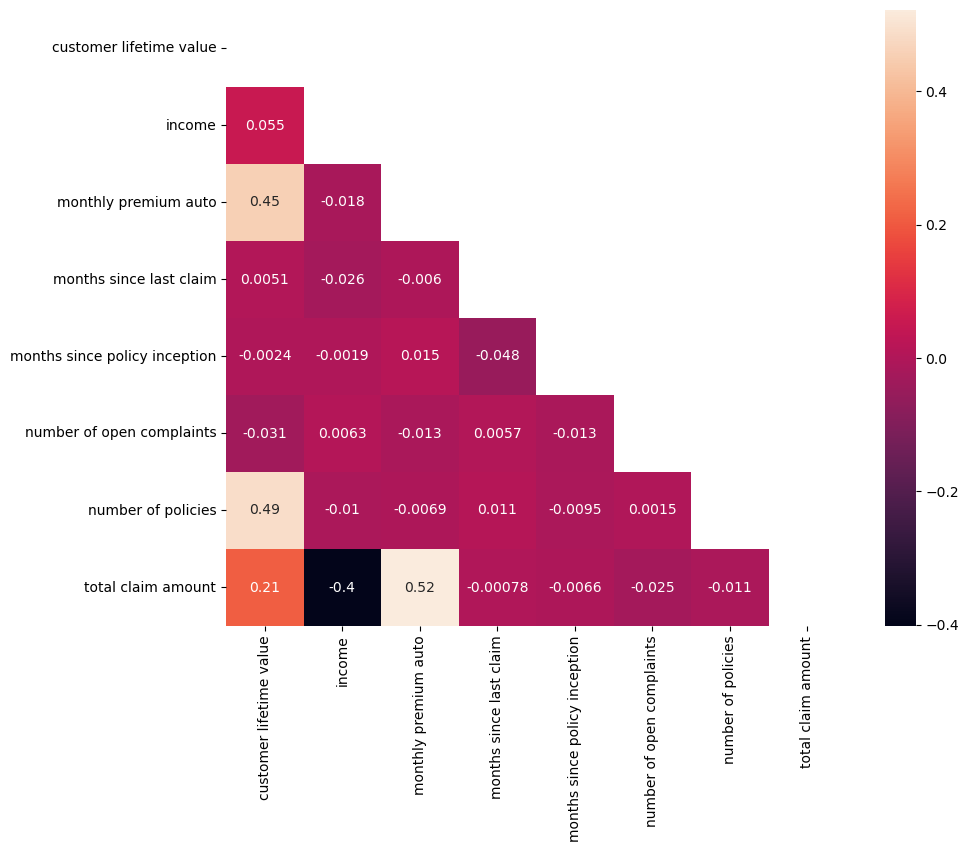

In [74]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [81]:
x = df.drop(['customer lifetime value'], axis=1)
y = df['customer lifetime value']

# with 'add_constant' we force the model to have an intercept
x = sm.add_constant(x)

model = sm.OLS(y,x).fit() # to train the model

print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).